In [95]:
# Let's prepare the data for testing and validation in models

from constants import target_name, x_path, y_path, preprocessed_data
from libs.simple_processing import separate_target, normalize
import pandas as pd

# data = pd.read_csv(preprocessed_data, usecols=[3], engine='python')
data = pd.read_csv(preprocessed_data, engine='python')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609124 entries, 0 to 1609123
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   month_number   1609124 non-null  int64
 1   shop_id        1609124 non-null  int64
 2   item_id        1609124 non-null  int64
 3   monthly_sales  1609124 non-null  int64
dtypes: int64(4)
memory usage: 49.1 MB


    month_number  monthly_sales
0              0             15
1              1             22
2              2             38
3              3             30
4              4             21
5              5             25
6              6             18
7              7             20
8              8             27
9              9             14
10            10             30
11            11             47
12            12             48
13            13             38
14            14             43
15            15             35
16            16             55
17            17             50
18            18             41
19            19             37
20            20             43
21            21             45
22            22             62
23            23             77
24            24             67
25            25             54
26            26             74
27            27             34
28            28             34
29            29             20
30      

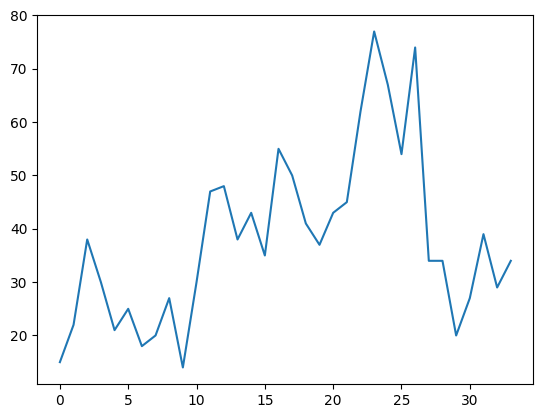

In [96]:

# Looks like the shop id is much better option - it is used almost 100K times
# Let's validate by drawing a global sales history for that shop and item

from pandas import DataFrame
import matplotlib.pyplot as plt

shop_id = 31#shops_frequent.index[0]
item_id = 5822#items_frequent.index[0] 22166

by_shop = data.query(f'shop_id=={shop_id} and item_id=={item_id}')
sales_shop = by_shop.groupby(['month_number'], as_index=False)['monthly_sales'].sum()

print(sales_shop)

fig, ax = plt.subplots()
ax.plot(sales_shop.month_number, sales_shop.monthly_sales)

In [97]:
import numpy as np

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    # print(dataset)
    dataX, dataY = [], []
    for curri in range(len(dataset)-look_back-1):
        nexti = curri + look_back
        # print(nexti)
        dataX.append(dataset[curri: nexti])
        dataY.append(dataset[nexti: nexti + 1])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
X, y = create_dataset(sales_shop.monthly_sales, look_back)

print('X: ', X, 'y: ', y)
# print(pd.DataFrame([X, y]))

# reshape input to be: [samples, time steps, features]
print(X.shape)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
print(X.shape)
print(X)

print(y.shape)
y = np.reshape(y, (y.shape[0], 1, y.shape[1]))
print(y.shape)

X:  [[15]
 [22]
 [38]
 [30]
 [21]
 [25]
 [18]
 [20]
 [27]
 [14]
 [30]
 [47]
 [48]
 [38]
 [43]
 [35]
 [55]
 [50]
 [41]
 [37]
 [43]
 [45]
 [62]
 [77]
 [67]
 [54]
 [74]
 [34]
 [34]
 [20]
 [27]
 [39]] y:  [[22]
 [38]
 [30]
 [21]
 [25]
 [18]
 [20]
 [27]
 [14]
 [30]
 [47]
 [48]
 [38]
 [43]
 [35]
 [55]
 [50]
 [41]
 [37]
 [43]
 [45]
 [62]
 [77]
 [67]
 [54]
 [74]
 [34]
 [34]
 [20]
 [27]
 [39]
 [29]]
(32, 1)
(32, 1, 1)
[[[15]]

 [[22]]

 [[38]]

 [[30]]

 [[21]]

 [[25]]

 [[18]]

 [[20]]

 [[27]]

 [[14]]

 [[30]]

 [[47]]

 [[48]]

 [[38]]

 [[43]]

 [[35]]

 [[55]]

 [[50]]

 [[41]]

 [[37]]

 [[43]]

 [[45]]

 [[62]]

 [[77]]

 [[67]]

 [[54]]

 [[74]]

 [[34]]

 [[34]]

 [[20]]

 [[27]]

 [[39]]]
(32, 1)
(32, 1, 1)


Epoch 1/200


2023-01-09 17:26:38.615509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-09 17:26:38.736527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 6/32 [====>.........................] - ETA: 0s - loss: 41.9132 - mean_absolute_error: 41.9132 

2023-01-09 17:26:38.822775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 8ms/step - loss: 39.1605 - mean_absolute_error: 39.1605
Epoch 2/200
32/32 [==============================] - 0s 7ms/step - loss: 38.1103 - mean_absolute_error: 38.1103
Epoch 3/200
32/32 [==============================] - 0s 8ms/step - loss: 36.8773 - mean_absolute_error: 36.8773
Epoch 4/200
32/32 [==============================] - 0s 7ms/step - loss: 35.5346 - mean_absolute_error: 35.5346
Epoch 5/200
32/32 [==============================] - 0s 10ms/step - loss: 33.9028 - mean_absolute_error: 33.9028
Epoch 6/200
32/32 [==============================] - 0s 7ms/step - loss: 32.4712 - mean_absolute_error: 32.4712
Epoch 7/200
32/32 [==============================] - 0s 8ms/step - loss: 31.3125 - mean_absolute_error: 31.3125
Epoch 8/200
32/32 [==============================] - 0s 8ms/step - loss: 30.0216 - mean_absolute_error: 30.0216
Epoch 9/200
32/32 [==============================] - 0s 7ms/step - loss: 28.5734 - mean_absolute_error: 28.5734
Epo

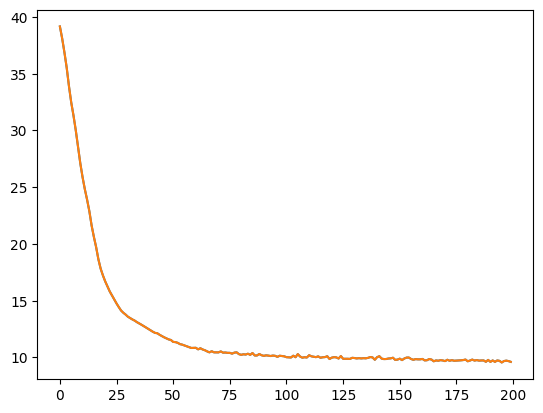

In [99]:
import tensorflow as tf
from libs.simple_plotter import plot_history

X_train = X.copy()
y_train = y.copy()

# features_count = X_train.shape[0]

early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.005,    # minimium amount of change to count as an improvement
    patience=7,         # how many epochs to wait before stopping
    restore_best_weights=True
)

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(40, input_shape=(1, look_back)))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam()
              , loss=tf.keras.losses.MeanAbsoluteError()
              , metrics=tf.metrics.MeanAbsoluteError())

history = model.fit(X_train, y_train
                    , epochs=200
                    , callbacks=[early_stopping]
                    , batch_size = 1
                    , use_multiprocessing=True)

# print(history.history)
plot_history(history)


1/1 [==============================] - 0s 59ms/step
<class 'numpy.ndarray'>
[[21.65971 ]
 [27.91018 ]
 [39.490696]
 [34.38789 ]
 [27.031557]
 [30.471193]
 [24.352083]
 [26.144062]
 [32.09767 ]
 [20.771074]
 [34.38789 ]
 [43.52026 ]
 [43.87071 ]
 [39.490696]
 [41.93441 ]
 [37.753536]
 [45.88297 ]
 [44.521076]
 [41.021973]
 [38.934986]
 [41.93441 ]
 [42.76547 ]
 [47.27518 ]
 [48.94585 ]
 [47.991177]
 [45.638206]
 [48.71297 ]
 [37.127422]
 [37.127422]
 [26.144062]
 [32.09767 ]
 [40.02348 ]]


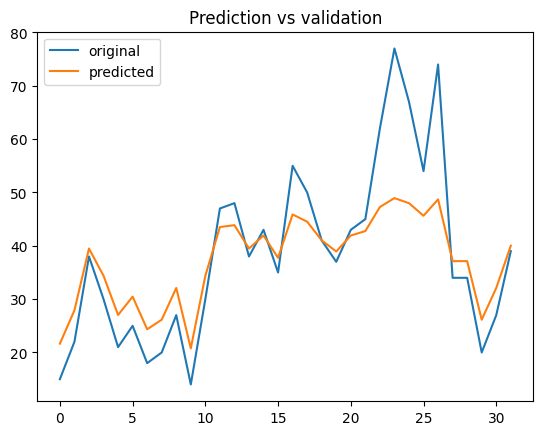

<Figure size 4000x1500 with 0 Axes>

In [137]:
from libs.simple_plotter import plot_predictions

y_pred = model.predict(X_train)
print(type(y_pred))
print(y_pred)
scale = range(len(y_pred))
plt.plot(scale, sales_shop.monthly_sales[:len(y_pred)], label="original")
plt.plot(scale, y_pred, label="predicted")
plt.title("Prediction vs validation")
plt.legend()
fig = plt.figure(figsize=(40, 15))

# pętla robiąca predykcję na kilka m-cy w przód




# lookback > 1
# wykres obrazujacy przewidywanie przyszłości
# dane sprxedaźowe tygodniowe zamiast mcznych

1/1 [==============================] - 0s 15ms/step


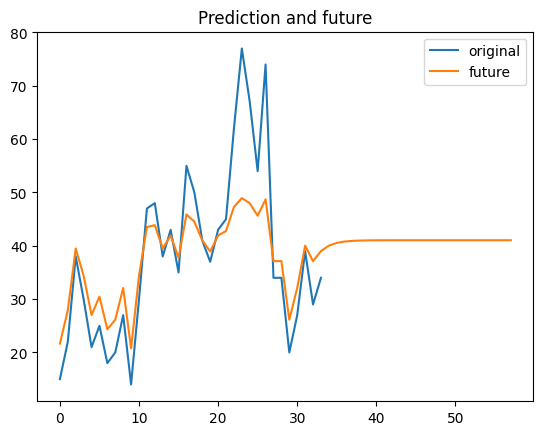

<Figure size 5000x2500 with 0 Axes>

In [139]:
last = [[34]]
pred = y_pred.copy()

for i in range(34, 60):
    new = model.predict(last)
    pred = np.append(pred, new)
    last = new

scale = range(len(sales_shop.monthly_sales))
scale1 = range(len(pred))
plt.plot(scale, sales_shop.monthly_sales[:len(sales_shop.monthly_sales)], label="original")
plt.plot(scale1, pred, label="future")
plt.title("Prediction and future")
plt.legend()
fig = plt.figure(figsize=(50, 25))
